In [163]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv('/kaggle/input/vital-sign-dataset/combined_output.csv')
#df = df.iloc[:, 1:]
df

,Time,HR,Pulse,SpO2,Perf,etCO2,imCO2,etN2O,inN2O,MAC,...,inO2,Tidal Volume,Minute Volume,RR,ECG,Pleth,CO2,AWP,AWF,AWV
0,00:00:00_000,55,55.0,100.0,0.4,0,0,0.0,0.0,0.0,...,98,0,0.0,0,-0.305,0.36850,0.0,0.54707,11.79334,0.0
1,00:00:00_010,55,55.0,100.0,0.4,0,0,0.0,0.0,0.0,...,98,0,0.0,0,-0.310,0.36801,0.0,0.57335,11.76310,0.0
2,00:00:00_020,55,55.0,100.0,0.4,0,0,0.0,0.0,0.0,...,98,0,0.0,0,-0.325,0.36728,0.0,0.58127,11.73633,0.0
3,00:00:00_030,55,55.0,100.0,0.4,0,0,0.0,0.0,0.0,...,98,0,0.0,0,-0.325,0.36630,0.0,0.55086,11.79232,0.0
4,00:00:00_040,55,55.0,100.0,0.4,0,0,0.0,0.0,0.0,...,98,0,0.0,0,-0.330,0.36508,0.0,0.54186,11.67379,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719995,01:59:59_950,51,51.0,98.0,3.0,39,1,0.0,0.0,0.4,...,95,882,6.1,8,-0.165,0.40098,36.7,8.17264,44.69420,593.5
719996,01:59:59_960,51,51.0,98.0,3.0,39,1,0.0,0.0,0.4,...,95,882,6.1,8,-0.165,0.39780,36.7,8.13857,44.88082,600.9
719997,01:59:59_970,51,51.0,98.0,3.0,39,1,0.0,0.0,0.4,...,95,882,6.1,8,-0.160,0.39658,36.7,8.12056,44.71950,608.4
719998,01:59:59_980,51,51.0,98.0,3.0,39,1,0.0,0.0,0.4,...,95,882,6.1,8,-0.160,0.39609,36.7,8.11281,44.32515,615.8


In [6]:
train_dates = pd.to_datetime(df['Time'], format='%H:%M:%S_%f')

In [7]:
train_dates.tail(15)

719985   1900-01-01 01:59:59.850
719986   1900-01-01 01:59:59.860
719987   1900-01-01 01:59:59.870
719988   1900-01-01 01:59:59.880
719989   1900-01-01 01:59:59.890
719990   1900-01-01 01:59:59.900
719991   1900-01-01 01:59:59.910
719992   1900-01-01 01:59:59.920
719993   1900-01-01 01:59:59.930
719994   1900-01-01 01:59:59.940
719995   1900-01-01 01:59:59.950
719996   1900-01-01 01:59:59.960
719997   1900-01-01 01:59:59.970
719998   1900-01-01 01:59:59.980
719999   1900-01-01 01:59:59.990
Name: Time, dtype: datetime64[ns]

In [8]:
df

,Time,HR,Pulse,SpO2,Perf,etCO2,imCO2,etN2O,inN2O,MAC,...,inO2,Tidal Volume,Minute Volume,RR,ECG,Pleth,CO2,AWP,AWF,AWV
0,00:00:00_000,55,55.0,100.0,0.4,0,0,0.0,0.0,0.0,...,98,0,0.0,0,-0.305,0.36850,0.0,0.54707,11.79334,0.0
1,00:00:00_010,55,55.0,100.0,0.4,0,0,0.0,0.0,0.0,...,98,0,0.0,0,-0.310,0.36801,0.0,0.57335,11.76310,0.0
2,00:00:00_020,55,55.0,100.0,0.4,0,0,0.0,0.0,0.0,...,98,0,0.0,0,-0.325,0.36728,0.0,0.58127,11.73633,0.0
3,00:00:00_030,55,55.0,100.0,0.4,0,0,0.0,0.0,0.0,...,98,0,0.0,0,-0.325,0.36630,0.0,0.55086,11.79232,0.0
4,00:00:00_040,55,55.0,100.0,0.4,0,0,0.0,0.0,0.0,...,98,0,0.0,0,-0.330,0.36508,0.0,0.54186,11.67379,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719995,01:59:59_950,51,51.0,98.0,3.0,39,1,0.0,0.0,0.4,...,95,882,6.1,8,-0.165,0.40098,36.7,8.17264,44.69420,593.5
719996,01:59:59_960,51,51.0,98.0,3.0,39,1,0.0,0.0,0.4,...,95,882,6.1,8,-0.165,0.39780,36.7,8.13857,44.88082,600.9
719997,01:59:59_970,51,51.0,98.0,3.0,39,1,0.0,0.0,0.4,...,95,882,6.1,8,-0.160,0.39658,36.7,8.12056,44.71950,608.4
719998,01:59:59_980,51,51.0,98.0,3.0,39,1,0.0,0.0,0.4,...,95,882,6.1,8,-0.160,0.39609,36.7,8.11281,44.32515,615.8


In [25]:
df = df.fillna(0)

In [27]:
col = list(df)[1:]
print(col)

['HR', 'Pulse', 'SpO2', 'Perf', 'etCO2', 'imCO2', 'etN2O', 'inN2O', 'MAC', 'etO2', 'inO2', 'Tidal Volume', 'Minute Volume', 'RR', 'ECG', 'Pleth', 'CO2', 'AWP', 'AWF', 'AWV']


In [28]:
df_train= df[col].astype(float)

In [29]:
scaler=StandardScaler()
scaler = scaler.fit(df_train)
df_for_training_scaled = scaler.transform(df_train)

In [30]:
df_for_training_scaled

array([[-0.34819961, -0.15789358,  0.39416229, ..., -1.26022426,
         0.6775851 , -0.47486354],
       [-0.34819961, -0.15789358,  0.39416229, ..., -1.24868359,
         0.6757383 , -0.47486354],
       [-0.34819961, -0.15789358,  0.39416229, ..., -1.24520557,
         0.67410342, -0.47486354],
       ...,
       [-1.85530353, -1.2667806 , -0.26694889, ...,  2.06562116,
         2.68842949,  0.95041639],
       [-1.85530353, -1.2667806 , -0.26694889, ...,  2.0622178 ,
         2.66434601,  0.96775214],
       [-1.85530353, -1.2667806 , -0.26694889, ...,  2.08149618,
         2.61578392,  0.98461936]])

In [31]:
df_for_training_scaled = pd.DataFrame(df_for_training_scaled)
df_for_training_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.348200,-0.157894,0.394162,-2.212791,-7.076737,-1.297005,-0.023841,-0.023841,-4.779838,6.754389,4.458262,-4.038927,-3.214084,-3.449768,-1.373889,-0.172496,-2.039605,-1.260224,0.677585,-0.474864
1,-0.348200,-0.157894,0.394162,-2.212791,-7.076737,-1.297005,-0.023841,-0.023841,-4.779838,6.754389,4.458262,-4.038927,-3.214084,-3.449768,-1.398694,-0.175750,-2.039605,-1.248684,0.675738,-0.474864
2,-0.348200,-0.157894,0.394162,-2.212791,-7.076737,-1.297005,-0.023841,-0.023841,-4.779838,6.754389,4.458262,-4.038927,-3.214084,-3.449768,-1.473112,-0.180597,-2.039605,-1.245206,0.674103,-0.474864
3,-0.348200,-0.157894,0.394162,-2.212791,-7.076737,-1.297005,-0.023841,-0.023841,-4.779838,6.754389,4.458262,-4.038927,-3.214084,-3.449768,-1.473112,-0.187104,-2.039605,-1.258560,0.677523,-0.474864
4,-0.348200,-0.157894,0.394162,-2.212791,-7.076737,-1.297005,-0.023841,-0.023841,-4.779838,6.754389,4.458262,-4.038927,-3.214084,-3.449768,-1.497917,-0.195205,-2.039605,-1.262512,0.670284,-0.474864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719995,-1.855304,-1.266781,-0.266949,-0.053214,-0.496005,-0.019889,-0.023841,-0.023841,-2.745749,3.268510,3.428617,2.672202,1.286553,-0.106363,-0.679327,0.043168,0.316406,2.088492,2.686884,0.915511
719996,-1.855304,-1.266781,-0.266949,-0.053214,-0.496005,-0.019889,-0.023841,-0.023841,-2.745749,3.268510,3.428617,2.672202,1.286553,-0.106363,-0.679327,0.022053,0.316406,2.073530,2.698282,0.932846
719997,-1.855304,-1.266781,-0.266949,-0.053214,-0.496005,-0.019889,-0.023841,-0.023841,-2.745749,3.268510,3.428617,2.672202,1.286553,-0.106363,-0.654521,0.013953,0.316406,2.065621,2.688429,0.950416
719998,-1.855304,-1.266781,-0.266949,-0.053214,-0.496005,-0.019889,-0.023841,-0.023841,-2.745749,3.268510,3.428617,2.672202,1.286553,-0.106363,-0.654521,0.010699,0.316406,2.062218,2.664346,0.967752


In [32]:
df_for_training_scaled.isnull().sum().sum()

0

In [33]:
trainX=[]
trainY=[]

In [34]:
n_future=5
n_past=20

In [35]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled.iloc[i - n_past:i, 0:df_for_training_scaled.shape[1]]) # Use iloc for integer-based indexing
    trainY.append(df_for_training_scaled.iloc[i + n_future - 1:i + n_future, 0]) # Use iloc for integer-based indexing

In [37]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [38]:
model=Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=1e-4, clipvalue=1.0)  # Try a smaller learning rate
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [41]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 20, 64)         │        21,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,209 (133.63 KB)

 Trainable params: 34,209 (133.63 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
np.isnan(trainX).sum()

0

In [43]:
print(np.isnan(trainX).any(), np.isinf(trainY).any())
print(np.isnan(trainX).any(), np.isinf(trainY).any())

False False
False False


In [46]:
m1 = model.fit(trainX, trainY, epochs = 100, batch_size = 128, validation_split = 0.1, verbose = 1)

Epoch 1/100
5063/5063 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - loss: 0.0173 - val_loss: 0.0064
Epoch 2/100
5063/5063 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - loss: 0.0173 - val_loss: 0.0065
Epoch 3/100
5063/5063 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - loss: 0.0175 - val_loss: 0.0074
Epoch 4/100
5063/5063 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - loss: 0.0174 - val_loss: 0.0037
Epoch 5/100
5063/5063 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - loss: 0.0170 - val_loss: 0.0033
Epoch 6/100
5063/5063 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - loss: 0.0166 - val_loss: 0.0047
Epoch 7/100
5063/5063 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - loss: 0.0169 - val_loss: 0.0038
Epoch 8/100
5063/5063 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - loss: 0.0164 - val_loss: 0.0030
Epoch 9/100
5063/5063 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - loss: 0.0165 - val_loss: 0.0019
Epoch 10/100
5063/5063 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - loss: 0.0159 - val_loss: 0.0039
Epoch 11/100
5063/5063 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - loss: 0.0160 - val_loss: 0.0025
Epoch 12

In [47]:
# Save the model to an HDF5 file
model.save('lstm_multivariate2.h5')

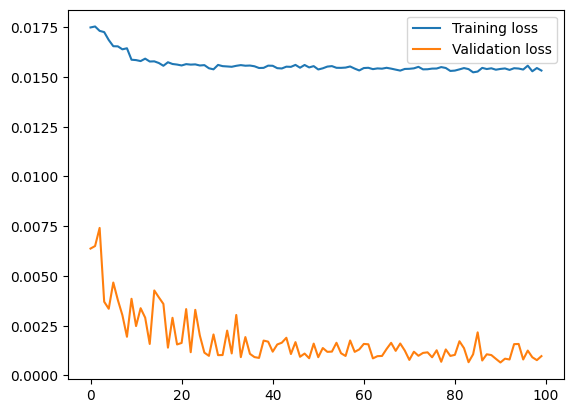

In [48]:
plt.plot(m1.history['loss'], label='Training loss')
plt.plot(m1.history['val_loss'], label='Validation loss')
plt.legend()

In [52]:
train_dates = pd.to_datetime(df['Time'], format='%H:%M:%S_%f')
print(train_dates.head(15))

0    1900-01-01 00:00:00.000
1    1900-01-01 00:00:00.010
2    1900-01-01 00:00:00.020
3    1900-01-01 00:00:00.030
4    1900-01-01 00:00:00.040
5    1900-01-01 00:00:00.050
6    1900-01-01 00:00:00.060
7    1900-01-01 00:00:00.070
8    1900-01-01 00:00:00.080
9    1900-01-01 00:00:00.090
10   1900-01-01 00:00:00.100
11   1900-01-01 00:00:00.110
12   1900-01-01 00:00:00.120
13   1900-01-01 00:00:00.130
14   1900-01-01 00:00:00.140
Name: Time, dtype: datetime64[ns]


In [138]:
n_future=9600
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='.010S').tolist()
forecast_period_dates

/tmp/ipykernel_30/1160404461.py:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='.010S').tolist()


[Timestamp('1900-01-01 01:59:59.990000'),
 Timestamp('1900-01-01 02:00:00'),
 Timestamp('1900-01-01 02:00:00.010000'),
 Timestamp('1900-01-01 02:00:00.020000'),
 Timestamp('1900-01-01 02:00:00.030000'),
 Timestamp('1900-01-01 02:00:00.040000'),
 Timestamp('1900-01-01 02:00:00.050000'),
 Timestamp('1900-01-01 02:00:00.060000'),
 Timestamp('1900-01-01 02:00:00.070000'),
 Timestamp('1900-01-01 02:00:00.080000'),
 Timestamp('1900-01-01 02:00:00.090000'),
 Timestamp('1900-01-01 02:00:00.100000'),
 Timestamp('1900-01-01 02:00:00.110000'),
 Timestamp('1900-01-01 02:00:00.120000'),
 Timestamp('1900-01-01 02:00:00.130000'),
 Timestamp('1900-01-01 02:00:00.140000'),
 Timestamp('1900-01-01 02:00:00.150000'),
 Timestamp('1900-01-01 02:00:00.160000'),
 Timestamp('1900-01-01 02:00:00.170000'),
 Timestamp('1900-01-01 02:00:00.180000'),
 Timestamp('1900-01-01 02:00:00.190000'),
 Timestamp('1900-01-01 02:00:00.200000'),
 Timestamp('1900-01-01 02:00:00.210000'),
 Timestamp('1900-01-01 02:00:00.220000'),

In [139]:
trainX[-n_future:]

array([[[-1.47852755, -0.98955885,  0.0636067 , ..., -0.38653162,
         -0.13711805, -0.3122823 ],
        [-1.47852755, -0.98955885,  0.0636067 , ..., -0.39754533,
         -0.13009607, -0.3129851 ],
        [-1.47852755, -0.98955885,  0.0636067 , ..., -0.40502393,
         -0.12266797, -0.31345364],
        ...,
        [-1.47852755, -0.98955885,  0.0636067 , ..., -0.41383754,
         -0.13960243, -0.32212151],
        [-1.47852755, -0.98955885,  0.0636067 , ..., -0.42228226,
         -0.13225983, -0.32259005],
        [-1.47852755, -0.98955885,  0.0636067 , ..., -0.41996358,
         -0.13463062, -0.32329285]],

       [[-1.47852755, -0.98955885,  0.0636067 , ..., -0.39754533,
         -0.13009607, -0.3129851 ],
        [-1.47852755, -0.98955885,  0.0636067 , ..., -0.40502393,
         -0.12266797, -0.31345364],
        [-1.47852755, -0.98955885,  0.0636067 , ..., -0.40279309,
         -0.11928828, -0.31392217],
        ...,
        [-1.47852755, -0.98955885,  0.0636067 , ..., -

In [140]:
forecast = model.predict(trainX[-n_future:])
forecast

300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[-1.4795159],
       [-1.4798093],
       [-1.4799666],
       ...,
       [-1.8242561],
       [-1.8242233],
       [-1.8238342]], dtype=float32)

In [141]:
forecast_copies = np.repeat(forecast, df_train.shape[1],axis=1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]

In [142]:
y_pred_future

array([51.997375, 51.996597, 51.99618 , ..., 51.0824  , 51.08249 ,
       51.083523], dtype=float32)

In [143]:
forecast_copies

array([[-1.4795159, -1.4795159, -1.4795159, ..., -1.4795159, -1.4795159,
        -1.4795159],
       [-1.4798093, -1.4798093, -1.4798093, ..., -1.4798093, -1.4798093,
        -1.4798093],
       [-1.4799666, -1.4799666, -1.4799666, ..., -1.4799666, -1.4799666,
        -1.4799666],
       ...,
       [-1.8242561, -1.8242561, -1.8242561, ..., -1.8242561, -1.8242561,
        -1.8242561],
       [-1.8242233, -1.8242233, -1.8242233, ..., -1.8242233, -1.8242233,
        -1.8242233],
       [-1.8238342, -1.8238342, -1.8238342, ..., -1.8238342, -1.8238342,
        -1.8238342]], dtype=float32)

In [144]:
forecast_period_dates

[Timestamp('1900-01-01 01:59:59.990000'),
 Timestamp('1900-01-01 02:00:00'),
 Timestamp('1900-01-01 02:00:00.010000'),
 Timestamp('1900-01-01 02:00:00.020000'),
 Timestamp('1900-01-01 02:00:00.030000'),
 Timestamp('1900-01-01 02:00:00.040000'),
 Timestamp('1900-01-01 02:00:00.050000'),
 Timestamp('1900-01-01 02:00:00.060000'),
 Timestamp('1900-01-01 02:00:00.070000'),
 Timestamp('1900-01-01 02:00:00.080000'),
 Timestamp('1900-01-01 02:00:00.090000'),
 Timestamp('1900-01-01 02:00:00.100000'),
 Timestamp('1900-01-01 02:00:00.110000'),
 Timestamp('1900-01-01 02:00:00.120000'),
 Timestamp('1900-01-01 02:00:00.130000'),
 Timestamp('1900-01-01 02:00:00.140000'),
 Timestamp('1900-01-01 02:00:00.150000'),
 Timestamp('1900-01-01 02:00:00.160000'),
 Timestamp('1900-01-01 02:00:00.170000'),
 Timestamp('1900-01-01 02:00:00.180000'),
 Timestamp('1900-01-01 02:00:00.190000'),
 Timestamp('1900-01-01 02:00:00.200000'),
 Timestamp('1900-01-01 02:00:00.210000'),
 Timestamp('1900-01-01 02:00:00.220000'),

In [145]:
forecast_dates = pd.to_datetime(forecast_period_dates,format = '%d-%m-%Y-%H:%M:%S:%f')
forecast_dates = np.array(forecast_dates)
forecast_dates
#df_forecast = pd.DataFrame({'Date': np.array(forecast_dates), 'Feature_1':y_pred_future})

array(['1900-01-01T01:59:59.990000000', '1900-01-01T02:00:00.000000000',
       '1900-01-01T02:00:00.010000000', ...,
       '1900-01-01T02:01:35.960000000', '1900-01-01T02:01:35.970000000',
       '1900-01-01T02:01:35.980000000'], dtype='datetime64[ns]')

In [146]:
df_forecast = pd.DataFrame({'Time': np.array(forecast_dates), 'HR':y_pred_future})

In [147]:
df_forecast

,Time,HR
0,1900-01-01 01:59:59.990,51.997375
1,1900-01-01 02:00:00.000,51.996597
2,1900-01-01 02:00:00.010,51.996181
3,1900-01-01 02:00:00.020,51.995159
4,1900-01-01 02:00:00.030,51.995209
...,...,...
9595,1900-01-01 02:01:35.940,51.083023
9596,1900-01-01 02:01:35.950,51.082729
9597,1900-01-01 02:01:35.960,51.082401
9598,1900-01-01 02:01:35.970,51.082489


In [148]:
df_forecast['Time']=pd.to_datetime(df_forecast['Time'])

In [149]:
df_forecast
df_forecast.to_csv("Forecasted_Feature_1.csv")

In [150]:
original = df[['Time','HR']]
original['Time']=pd.to_datetime(df_forecast['Time'])

/tmp/ipykernel_30/3105334200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Time']=pd.to_datetime(df_forecast['Time'])


In [154]:
original.isnull().sum().sum()

0

In [155]:
original['Time']

700000   1900-01-01 01:56:40.000
700001   1900-01-01 01:56:40.010
700002   1900-01-01 01:56:40.020
700003   1900-01-01 01:56:40.030
700004   1900-01-01 01:56:40.040
                   ...          
719995   1900-01-01 01:59:59.950
719996   1900-01-01 01:59:59.960
719997   1900-01-01 01:59:59.970
719998   1900-01-01 01:59:59.980
719999   1900-01-01 01:59:59.990
Name: Time, Length: 20000, dtype: datetime64[ns]

In [156]:
original = df[['Time', 'HR']]
original['Time']=pd.to_datetime(original['Time'], format = '%H:%M:%S_%f')
original = original.loc[original['Time'] >= pd.to_datetime('01:56:40_000',format = '%H:%M:%S_%f')]

/tmp/ipykernel_30/2989688264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Time']=pd.to_datetime(original['Time'], format = '%H:%M:%S_%f')


In [157]:
df.tail(20000)

,Time,HR,Pulse,SpO2,Perf,etCO2,imCO2,etN2O,inN2O,MAC,...,inO2,Tidal Volume,Minute Volume,RR,ECG,Pleth,CO2,AWP,AWF,AWV
700000,01:56:40_000,52,52.0,99.0,4.0,41,1,0.0,0.0,0.6,...,91,779,4.9,6,0.170,0.27179,39.7,1.87351,0.00000,47.0
700001,01:56:40_010,52,52.0,99.0,4.0,41,1,0.0,0.0,0.6,...,91,779,4.9,6,0.065,0.27131,39.7,1.84610,0.00000,47.0
700002,01:56:40_020,52,52.0,99.0,4.0,41,1,0.0,0.0,0.6,...,91,779,4.9,6,0.000,0.27155,39.7,1.83045,0.00000,47.0
700003,01:56:40_030,52,52.0,99.0,4.0,41,1,0.0,0.0,0.6,...,91,779,4.9,6,-0.075,0.27155,39.7,1.83556,0.00000,47.0
700004,01:56:40_040,52,52.0,99.0,4.0,41,1,0.0,0.0,0.6,...,91,779,4.9,6,-0.145,0.27082,39.7,1.82539,0.00878,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719995,01:59:59_950,51,51.0,98.0,3.0,39,1,0.0,0.0,0.4,...,95,882,6.1,8,-0.165,0.40098,36.7,8.17264,44.69420,593.5
719996,01:59:59_960,51,51.0,98.0,3.0,39,1,0.0,0.0,0.4,...,95,882,6.1,8,-0.165,0.39780,36.7,8.13857,44.88082,600.9
719997,01:59:59_970,51,51.0,98.0,3.0,39,1,0.0,0.0,0.4,...,95,882,6.1,8,-0.160,0.39658,36.7,8.12056,44.71950,608.4
719998,01:59:59_980,51,51.0,98.0,3.0,39,1,0.0,0.0,0.4,...,95,882,6.1,8,-0.160,0.39609,36.7,8.11281,44.32515,615.8


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: xlabel='Time', ylabel='HR'>

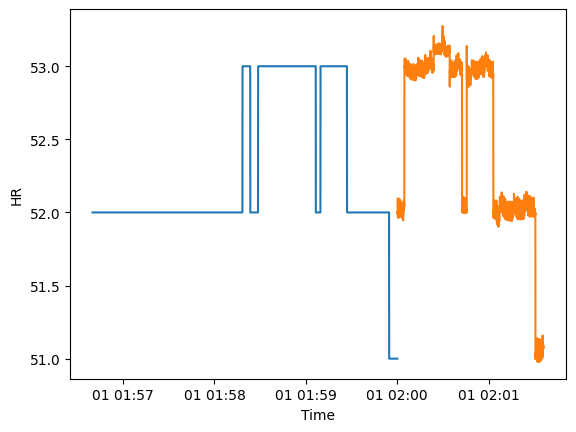

In [158]:
sns.lineplot(x=original['Time'], y=original['HR'])
sns.lineplot(x=df_forecast['Time'], y=df_forecast['HR'])

In [159]:
df_test = pd.read_csv("/kaggle/input/vital-sign-test/uq_vsd_case01_fulldata_13_test.csv")
df_test = df_test.fillna(51)
df_test

,Time,HR,SpO2,Perf,etCO2,imCO2,etN2O,inN2O,MAC,etO2,inO2,Tidal Volume,Minute Volume,RR,ECG,Pleth,CO2,AWP,AWF,AWV
0,02:00:00_000,51.0,98,3.0,39,1,0.0,0.0,0.4,88,95,882,6.1,8,-0.160,0.39512,36.8,8.20354,43.02551,630.2
1,02:00:00_010,51.0,98,3.0,39,1,0.0,0.0,0.4,88,95,882,6.1,8,-0.155,0.39243,36.8,8.18365,43.15805,637.4
2,02:00:00_020,51.0,98,3.0,39,1,0.0,0.0,0.4,88,95,882,6.1,8,-0.150,0.39170,36.8,8.16036,42.97751,644.6
3,02:00:00_030,51.0,98,3.0,39,1,0.0,0.0,0.4,88,95,882,6.1,8,-0.145,0.39145,36.8,8.16700,42.43487,651.6
4,02:00:00_040,51.0,98,3.0,39,1,0.0,0.0,0.4,88,95,882,6.1,8,-0.140,0.39243,36.8,8.13787,42.65852,658.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,02:01:35_950,51.0,98,1.2,38,1,0.0,0.0,0.2,91,97,5,5.0,7,-0.005,0.49988,0.6,0.61895,7.21309,0.0
9596,02:01:35_960,51.0,98,1.2,38,1,0.0,0.0,0.2,91,97,5,5.0,7,-0.005,0.49988,0.6,0.51077,6.85939,0.0
9597,02:01:35_970,51.0,98,1.2,38,1,0.0,0.0,0.2,91,97,5,5.0,7,-0.005,0.49988,0.6,0.31726,6.37660,0.0
9598,02:01:35_980,51.0,98,1.2,38,1,0.0,0.0,0.2,91,97,5,5.0,7,-0.005,0.49988,0.6,0.29477,6.41633,0.0


In [160]:
df_test['Time']=pd.to_datetime(df_test['Time'], format = '%H:%M:%S_%f')

In [161]:
df_test

,Time,HR,SpO2,Perf,etCO2,imCO2,etN2O,inN2O,MAC,etO2,inO2,Tidal Volume,Minute Volume,RR,ECG,Pleth,CO2,AWP,AWF,AWV
0,1900-01-01 02:00:00.000,51.0,98,3.0,39,1,0.0,0.0,0.4,88,95,882,6.1,8,-0.160,0.39512,36.8,8.20354,43.02551,630.2
1,1900-01-01 02:00:00.010,51.0,98,3.0,39,1,0.0,0.0,0.4,88,95,882,6.1,8,-0.155,0.39243,36.8,8.18365,43.15805,637.4
2,1900-01-01 02:00:00.020,51.0,98,3.0,39,1,0.0,0.0,0.4,88,95,882,6.1,8,-0.150,0.39170,36.8,8.16036,42.97751,644.6
3,1900-01-01 02:00:00.030,51.0,98,3.0,39,1,0.0,0.0,0.4,88,95,882,6.1,8,-0.145,0.39145,36.8,8.16700,42.43487,651.6
4,1900-01-01 02:00:00.040,51.0,98,3.0,39,1,0.0,0.0,0.4,88,95,882,6.1,8,-0.140,0.39243,36.8,8.13787,42.65852,658.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,1900-01-01 02:01:35.950,51.0,98,1.2,38,1,0.0,0.0,0.2,91,97,5,5.0,7,-0.005,0.49988,0.6,0.61895,7.21309,0.0
9596,1900-01-01 02:01:35.960,51.0,98,1.2,38,1,0.0,0.0,0.2,91,97,5,5.0,7,-0.005,0.49988,0.6,0.51077,6.85939,0.0
9597,1900-01-01 02:01:35.970,51.0,98,1.2,38,1,0.0,0.0,0.2,91,97,5,5.0,7,-0.005,0.49988,0.6,0.31726,6.37660,0.0
9598,1900-01-01 02:01:35.980,51.0,98,1.2,38,1,0.0,0.0,0.2,91,97,5,5.0,7,-0.005,0.49988,0.6,0.29477,6.41633,0.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

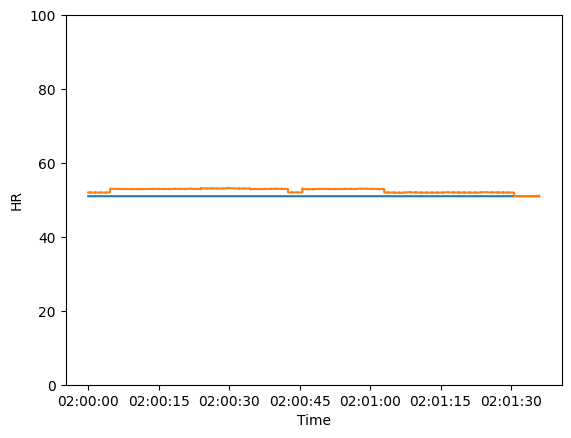

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=df_test['Time'], y=df_test['HR'])
sns.lineplot(x=df_forecast['Time'], y=df_forecast['HR'])

# Set y-axis limit from 0 to 100
plt.ylim(0, 100)

# Show plot
plt.show()


In [165]:
score = np.sqrt(mean_squared_error(df_test['HR'], df_forecast['HR']))
print(f'RMSE Score on Test set: {score:f}')

RMSE Score on Test set: 1.631998


In [167]:
accuracy = 1 - (score / np.mean(df_test['HR']))

print(f"Accuracy: {accuracy * 100:f}%")

Accuracy: 96.800004%
